# Graded Challenge 4

_Graded Challenge_ ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada konsep Clustering.

_Graded Challenge_ ini dibuat oleh Risqi Rahmatullah Batch 007

## Deskripsi Data

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

- CUSTID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases
- BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFFPURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTSPURCHASES : Amount of purchase done in installment
- CASHADVANCE : Cash in advance given by the user
- PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASESTRX : Numbe of purchase transactions made
- CREDITLIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user

Sumber: https://www.kaggle.com/arjunbhasin2013/ccdata

## Sasaran Tugas

*Graded Challenge 4* ini dibuat guna mengevaluasi konsep Clustering sebagai berikut:

- Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
- Mampu mempersiapkan data untuk digunakan dalam Clustering
- Mampu mengimplementasikan Clustering pada data yang diberikan

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

## Pemuatan Data

In [2]:
cc = pd.read_csv('CC GENERAL.csv')
cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Exploratory Data Analysis (EDA)

In [3]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
# ringkasan informasi statistik fitur numerik
cc.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
# ringkasan informasi statistik fitur non-numerik
cc.describe(exclude=np.number)

,CUST_ID
count,8950
unique,8950
top,C10001
freq,1


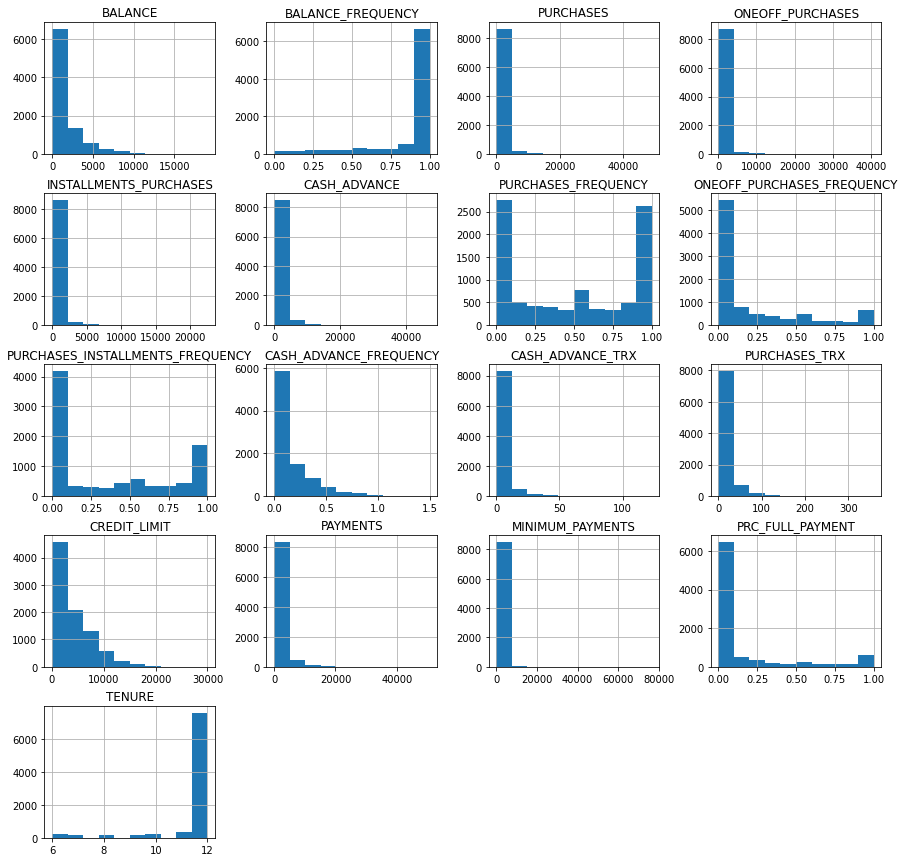

In [6]:
# distribusi data fitur
cc.hist(figsize=(15,15))
plt.show()

Tidak ada atribut yang terdistribusi normal.

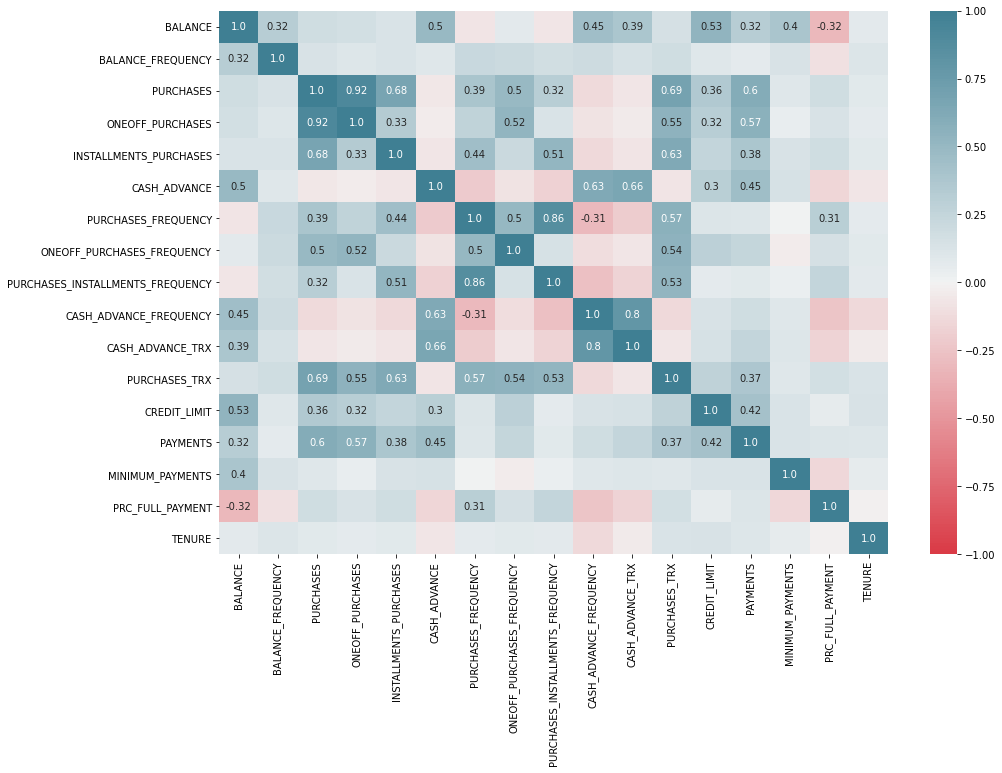

In [7]:
# korelasi antara atribut di atas absolut 0,3
annot_labels = cc.corr()
annot_labels = annot_labels.round(2)
annot_mask = abs(cc.corr()) < 0.3 
annot_labels[annot_mask] = ''

plt.figure(figsize = (15,10))
sns.heatmap(cc.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(10, 220, n=200), annot=annot_labels, fmt='')
plt.show()

Di antara fitur yang saling berkolerasi, hanya ada dua pasang fitur yang saling berkolerasi negatif. Saya coba dalami kedua pasang fitur tersebut.

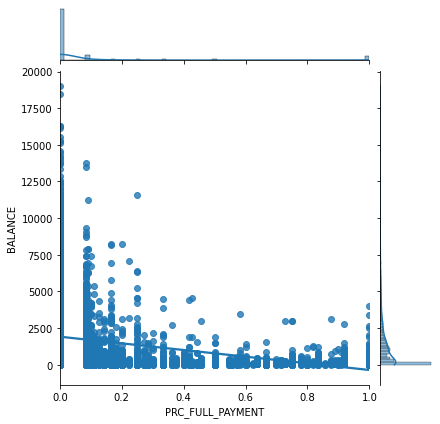

In [8]:
# grafik hubungan fitur 'PRC_FULL_PAYMENT' dan 'BALANCE'
sns.jointplot(data=cc, x='PRC_FULL_PAYMENT', y='BALANCE', kind='reg')
plt.show()

Jika dilihat dari garis linear regresi, semakin tinggi persentase pembayaran penuh yang dibayarkan pelanggan, semakin kecil saldo yang tersisa pada akun pelanggan. Namun, tidak sedikit juga pelanggan yang memiliki persentase pembayaran penuh rendah dan saldo yang tersisa juga kecil.

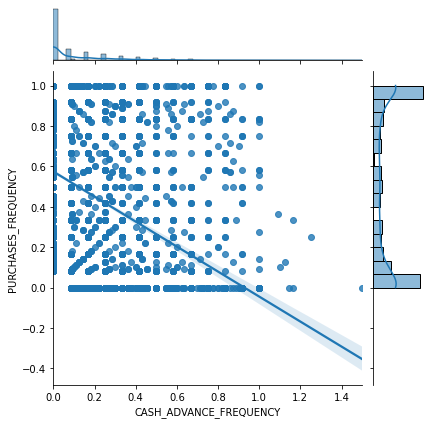

In [9]:
# grafik hubungan fitur 'CASH_ADVANCE_FREQUENCY' dan 'PURCHASES_FREQUENCY'
sns.jointplot(data=cc, x='CASH_ADVANCE_FREQUENCY', y='PURCHASES_FREQUENCY', kind='reg')
plt.show()

Gambar pola hubungan kedua fitur ini cukup unik. Namun, secara keseluruhan korelasi kedua fitur ini berkolerasi negatif.

## Pra-pemrosesan Data

In [10]:
# menghitung persentase jumlah nilai yang hilang
cc.isna().sum() / len(cc) * 100

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

Persentase jumlah nilai yang hilang kecil jadi saya memutuskan untuk menghapus baris yang memiliki nilai yang hilang.

In [11]:
# menghapus kolom yang tidak dibutuhkan
data = cc.drop(['CUST_ID'], axis=1)

In [12]:
# menghapus baris yang memiliki nilai yang hilang
data.dropna(inplace=True)

### Feature Scaling

In [13]:
# Standarisasi
stdscaler = StandardScaler()
data_scaled = stdscaler.fit_transform(data)

## Pendefinisian Model

Saya akan mencoba menggunakan tiga model yaitu KMeans, Agglomerative Clustering, dan  Gaussian Mixture.

In [14]:
# model KMeans
kmeans = KMeans(random_state=3)

In [15]:
# model Agglomerative
agg = AgglomerativeClustering()

In [16]:
# model Gaussian Mixture
gm = GaussianMixture(random_state=3)

## Pelatihan Model

Saya hanya menggunakan KMeans sebagai dasar untuk menentukan jumlah kluster yang akan digunakan dalam model.

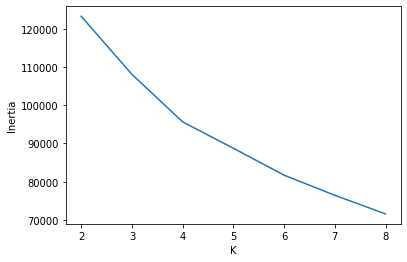

In [17]:
# grafik inertia
K = range(2, 9)
kmeans_models = [KMeans(n_clusters=i, random_state=3).fit(data_scaled) for i in K]
inertia = [model.inertia_ for model in kmeans_models]

plt.plot(K, inertia)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

Berdasarkan titik elbow pada grafik di atas, nilai K yang sesuai digunakan pada model KMeans yaitu 4.

In [18]:
def plot_silhouette(range_n_clusters,X):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(15, 5)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.20893403771896396
For n_clusters = 3 The average silhouette_score is : 0.24771296656343036
For n_clusters = 4 The average silhouette_score is : 0.1970448976486613
For n_clusters = 5 The average silhouette_score is : 0.1922483658488757
For n_clusters = 6 The average silhouette_score is : 0.20770957999132167
For n_clusters = 7 The average silhouette_score is : 0.21481829870610536
For n_clusters = 8 The average silhouette_score is : 0.22763265159651502


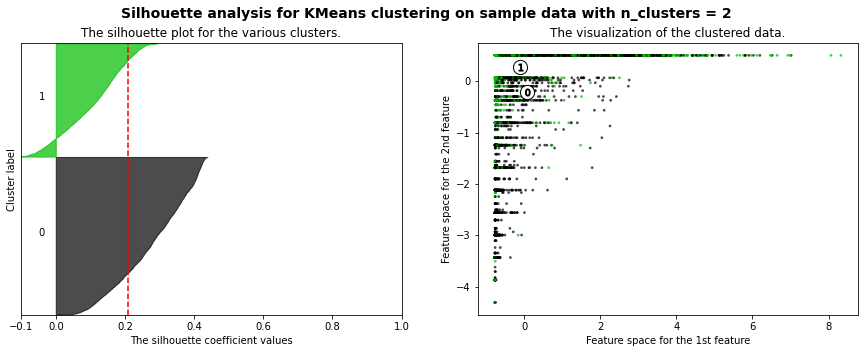

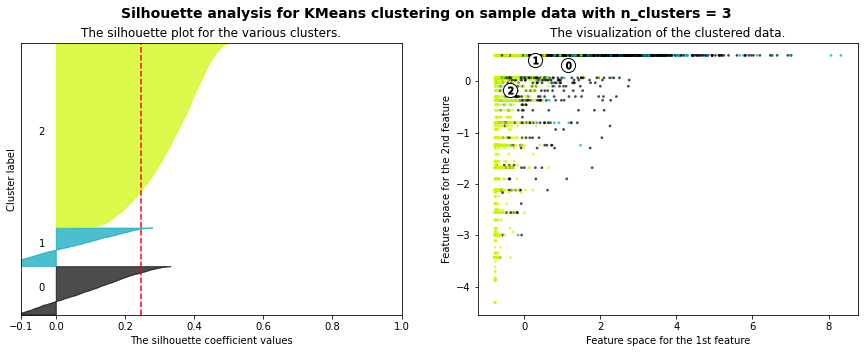

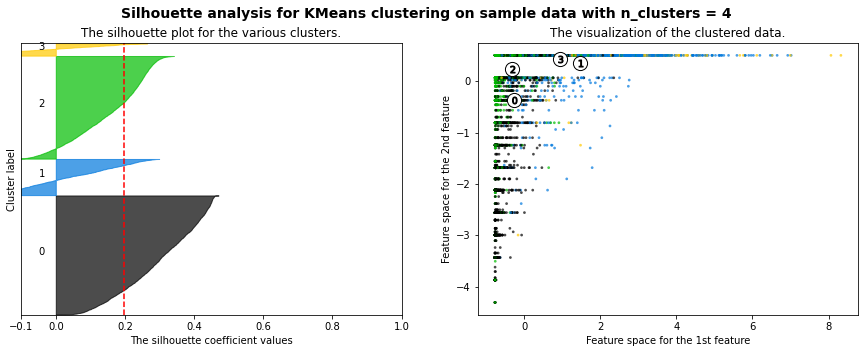

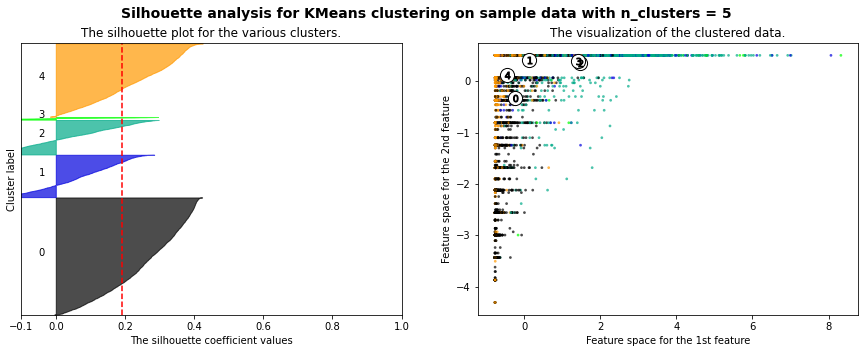

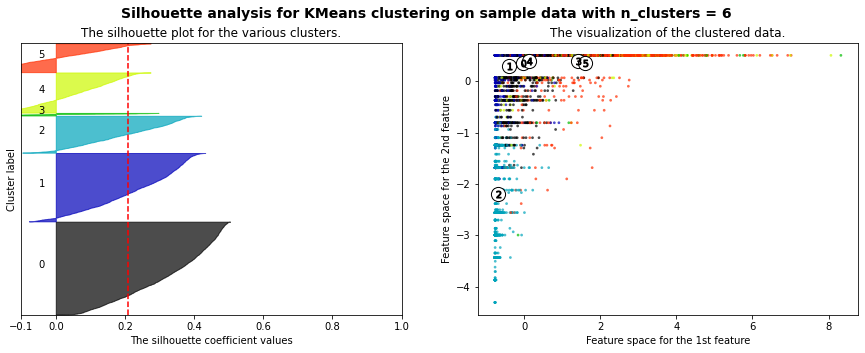

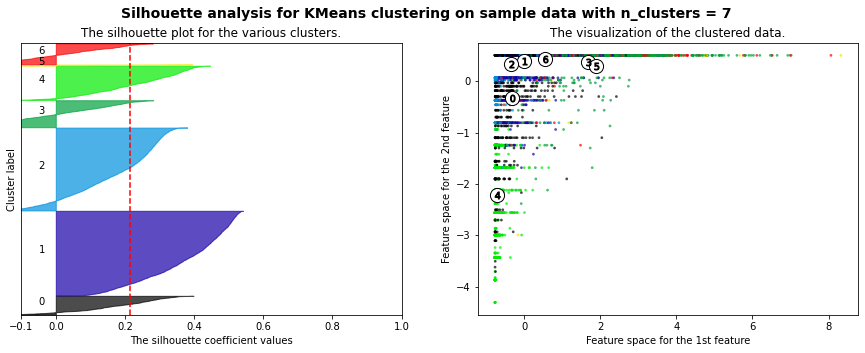

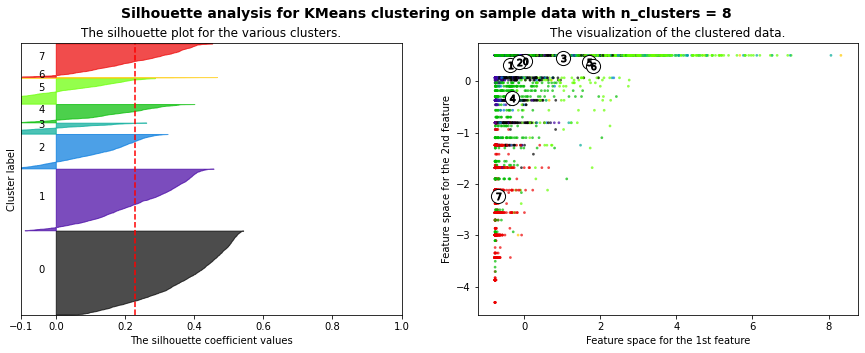

In [19]:
plot_silhouette(K, data_scaled)

Berdasarkan skor silhoutte, skor tertinggi pada saat K sama dengan 3.

Pengukuran berdasarkan inertia dan skor silhoutte menunjukkan hasil yang berbeda. Sehingga, saya memutuskan untuk menggunakan K = 3 berdasarkan skor silhoutte tertinggi.

## Evaluasi Model

Melatih kembali model dengan menetapkan ada 3 kluster.

In [20]:
# model K-Means
kmeans = KMeans(n_clusters=3, random_state=3)
label_km = kmeans.fit_predict(data_scaled)

# silhouette score
km_score = silhouette_score(data_scaled, label_km)
print('Skor Silhouette Model KMeans:', km_score)

Skor Silhouette Model KMeans: 0.24693706376967564


In [21]:
# model Agglomerative
linkage = ['ward', 'complete', 'average', 'single']
agg_results = {'score': {}, 'label': {}}
for la in linkage:
    agg = AgglomerativeClustering(n_clusters=3, linkage=la)
    label = agg.fit_predict(data_scaled)
    agg_results['score'][la] = silhouette_score(data_scaled, label)
    agg_results['label'][la] = label

In [22]:
print('Skor Silhouette Model Agglomerative Clustering dengan parameter linkage:')
for la in linkage:
    print(la.title(), ':', agg_results['score'][la])

Skor Silhouette Model Agglomerative Clustering dengan parameter linkage:
Ward : 0.17845266791386857
Complete : 0.7834605562019421
Average : 0.809869016385278
Single : 0.8359528860488419


In [23]:
# model Gaussian Mixture
cov_type = ['full', 'tied', 'diag', 'spherical']
gm_results = {'score': {}, 'label': {}}
for cov in cov_type:
    gm = GaussianMixture(n_components=3, covariance_type=cov, random_state=3)
    label = gm.fit_predict(data_scaled)
    gm_results['score'][cov] = silhouette_score(data_scaled, label)
    gm_results['label'][cov] = label    

In [24]:
print('Skor Silhouette Model Gaussian Mixture dengan parameter covariance_type:')
for cov in cov_type:
    print(cov.title(), ':', gm_results['score'][cov])

Skor Silhouette Model Gaussian Mixture dengan parameter covariance_type:
Full : 0.11512267967773161
Tied : 0.2502263991133264
Diag : 0.09108938626997048
Spherical : 0.07974905881786072


### Visualisasi dengan PCA

#### Agglomerative Clustering

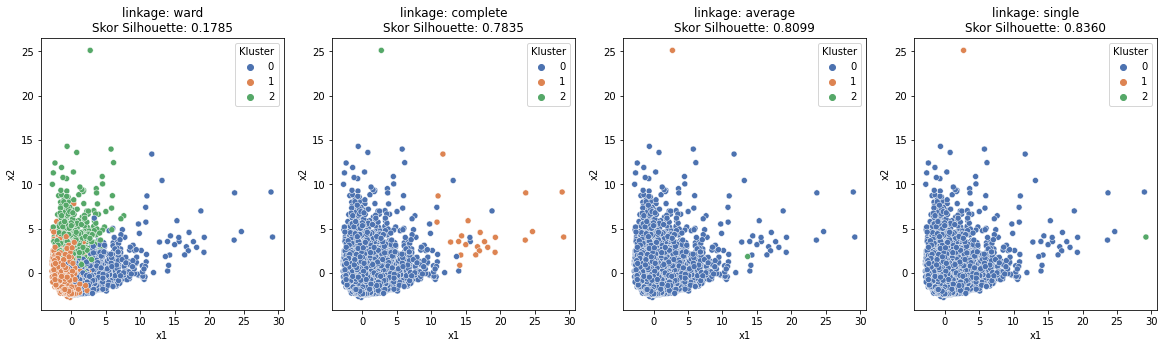

In [25]:
# melihat visualisasi 2 dimensi dengan PCA model Agglomerative Clustering
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_scaled)
pca_df = pd.DataFrame.from_records(data=pca_data, columns=["x1","x2"])

plt.figure(figsize=(20, 5))
for i, key in enumerate(agg_results['score']) :
    pca_df[key] = agg_results['label'][key]
    score = agg_results['score'][key]
    plt.subplot(1, 4, i+1)
    sns.scatterplot(data=pca_df, x="x1", y="x2", hue=key, palette="deep")
    plt.title(f'linkage: {key}\nSkor Silhouette: {score:,.4f}')
    plt.legend(title="Kluster")
plt.show()

Secara visual, model Agglomerative Clustering terbaik pada parameter linkage ward dengan skor silhoutte 0,1785.

#### Gaussian Mixture

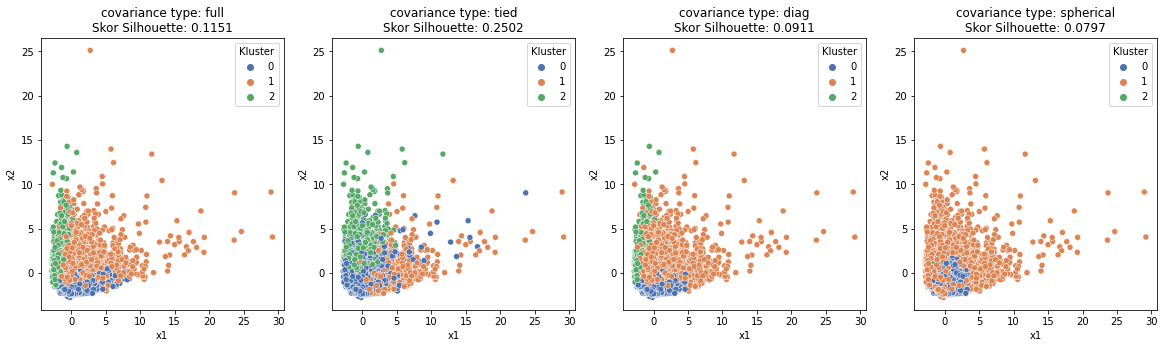

In [26]:
# melihat visualisasi 2 dimensi dengan PCA model Gaussian Mixture
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_scaled)
pca_df = pd.DataFrame.from_records(data=pca_data, columns=["x1","x2"])

plt.figure(figsize=(20, 5))
for i, key in enumerate(gm_results['score']) :
    pca_df[key] = gm_results['label'][key]
    score = gm_results['score'][key]
    plt.subplot(1, 4, i+1)
    sns.scatterplot(data=pca_df, x="x1", y="x2", hue=key, palette="deep")
    plt.title(f'covariance type: {key}\nSkor Silhouette: {score:,.4f}')
    plt.legend(title="Kluster")
plt.show()

Secara visual, model Gaussian Mixture terbaik pada parameter covariance type tied dengan skor silhoutte 0,2502.

In [27]:
# memasukkan label masing-masing model dengan parameter yang telah dipilih ke dalam dataframe
data['label_km'] = label_km
data['label_agg'] = agg_results['label']['ward']
data['label_gm'] = gm_results['label']['tied']
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,label_km,label_agg,label_gm
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,1,1,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0,2,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,1,0,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,1,1,0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,1,1,0


#### Perbandingan Antara Model

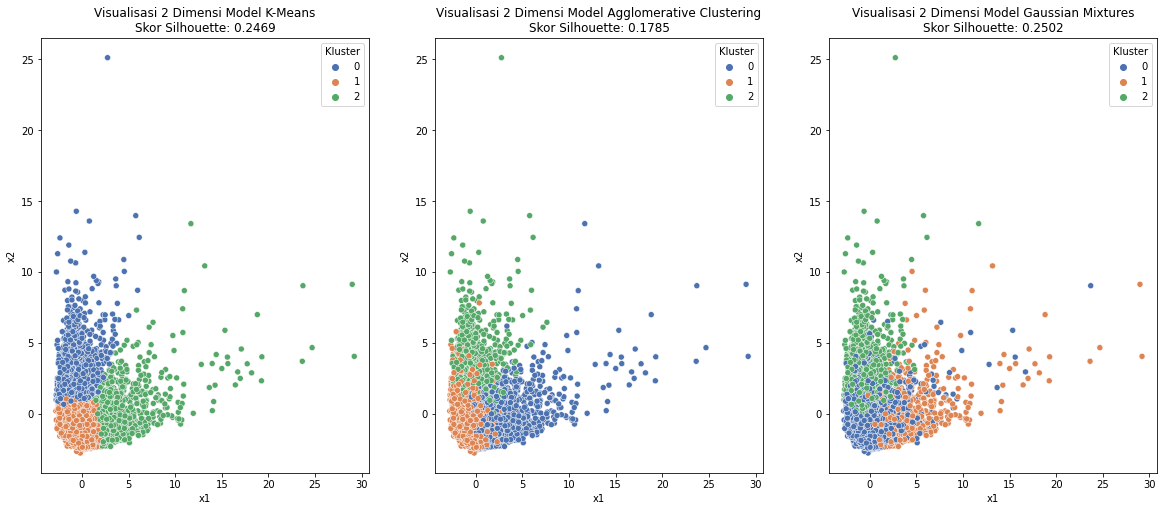

In [28]:
# melihat visualisasi 2 dimensi dengan PCA model K-Means dan Gaussian Mixture
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_scaled)
pca_df = pd.DataFrame.from_records(data=pca_data, columns=["x1","x2"])
pca_df["Kluster Kmeans"] = label_km
pca_df["Kluster Agglomerative"] = agg_results['label']['ward']
pca_df["Kluster GaussianMixture"] = gm_results['label']['tied']
agg_score = agg_results['score']['ward']
gm_score = gm_results['score']['tied']

plt.figure(figsize=(20, 8))
plt.subplot(131)
sns.scatterplot(data=pca_df, x="x1", y="x2", hue="Kluster Kmeans", palette="deep")
plt.title(f'Visualisasi 2 Dimensi Model K-Means\nSkor Silhouette: {km_score:,.4f}')
plt.legend(title="Kluster")

plt.subplot(132)
sns.scatterplot(data=pca_df, x="x1", y="x2", hue="Kluster Agglomerative", palette="deep")
plt.title(f'Visualisasi 2 Dimensi Model Agglomerative Clustering\nSkor Silhouette: {agg_score:,.4f}')
plt.legend(title="Kluster")

plt.subplot(133)
sns.scatterplot(data=pca_df, x="x1", y="x2", hue="Kluster GaussianMixture", palette="deep")
plt.title(f'Visualisasi 2 Dimensi Model Gaussian Mixtures\nSkor Silhouette: {gm_score:,.4f}')
plt.legend(title="Kluster")
plt.show()

Berdasarkan skor silhouette, model Agglomerative Clustering memiliki skor terendah, sedangkan model KMeans dan Gaussian Mixture memiliki skor silhouette yang tidak jauh berbeda. Secara visual 2 dimensi, terlihat model KMeans membagi kluster lebih baik dibandingkan Gaussian Mixture yang terlihat beberapa poin data antar kluster saling bercampur. Jadi dari skor silhoutte dan tampak visual, saya memutuskan untuk menggunakan **model KMeans** untuk analisis selanjutnya.

### Interpretasi Kluster

Untuk memudahkan melihat kemiripan distribusi data, saya menghilangkan pencilannya.

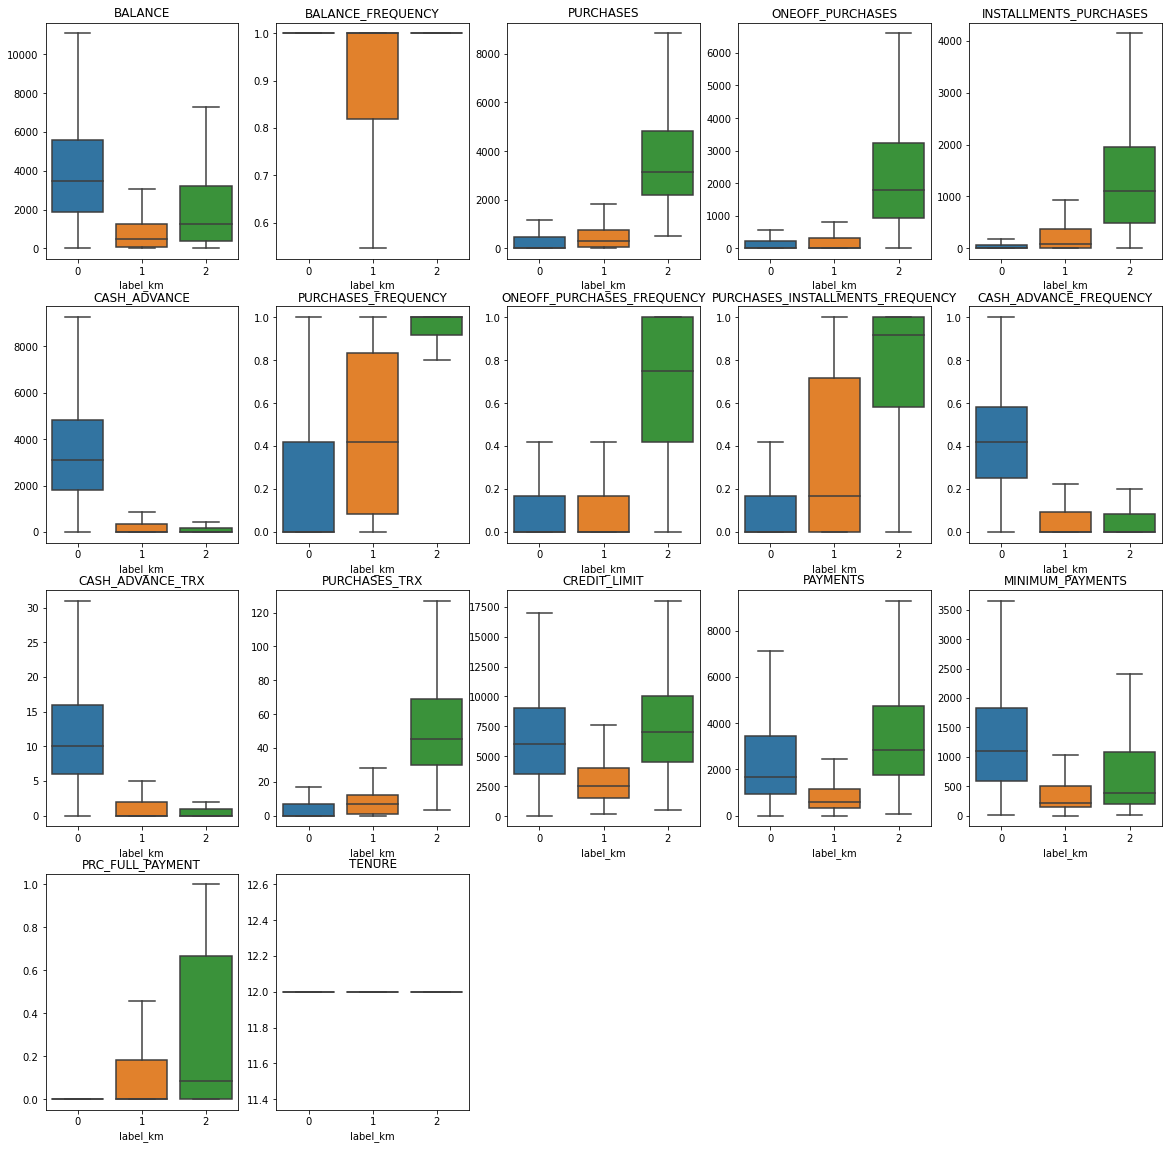

In [29]:
# melihat distribusi data dari ringkasan statistik tanpa pencilan
df = data.copy()

plt.figure(figsize=(20, 20))
for i, col in enumerate(df.columns[:-3]):
    plt.subplot(4, 5, i+1)
    sns.boxplot(x="label_km", y=col, data=df, showfliers = False)
    plt.ylabel('')
    plt.title(col)
plt.show()

Beberapa fitur memiliki bentuk boxplot yang mirip. Saya mencoba mengelompokkan fitur-fitur tersebut.

Kelompok Fitur 1: Ada kemiripan distribusi di antara kluster


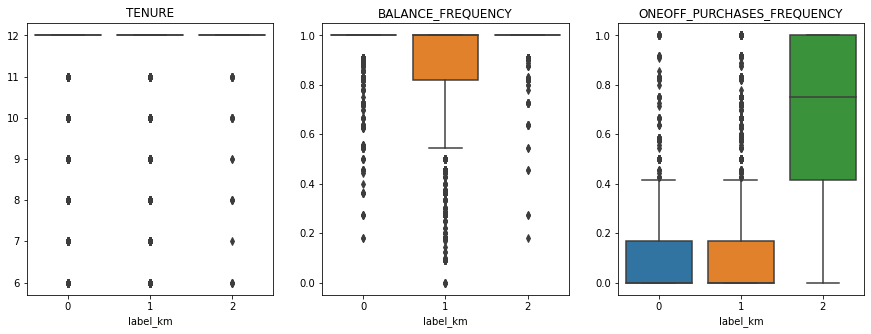




Kelompok Fitur 2: Frekuensi Pembayaran
Nilai maksimum sama, tetapi urutan nilai Q3 antara kluster berbeda: 0 < 1 < 2


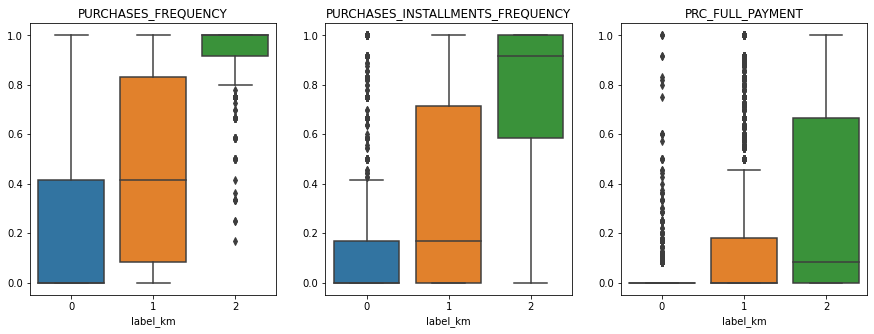




Kelompok Fitur 3: Jumlah Pembelian
Nilai maksimum kluster 2 jauh lebih tinggi dan urutan nilai Q3 kluster 0 < 1 < 2


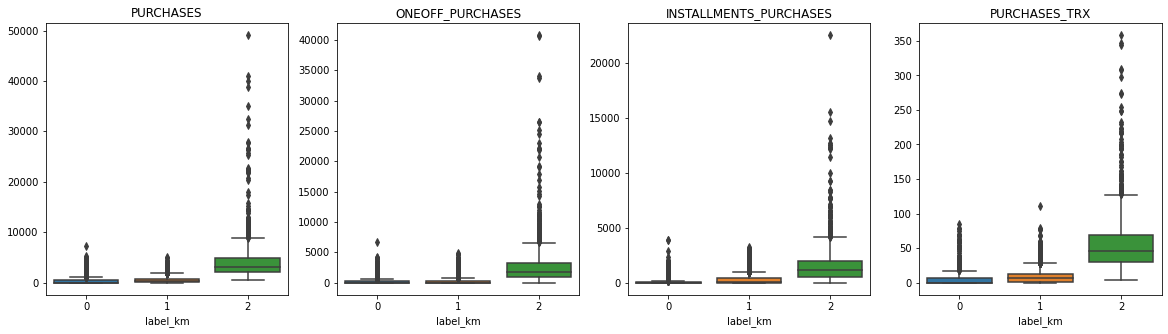




Kelompok Fitur 4: Uang Muka
Urutan nilai maksimum kluster 1 < 2 < 0, tetapi urutan nilai Q3  2 < 1 < 0


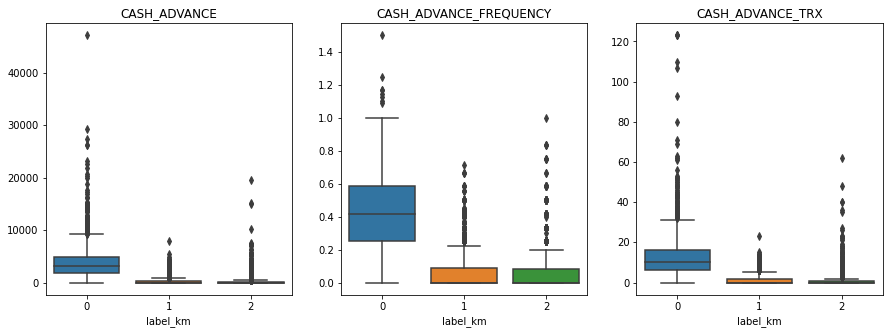




Kelompok Fitur 5: Urutan nilai upper bound dan Q3 kluster 1 < 0 < 2


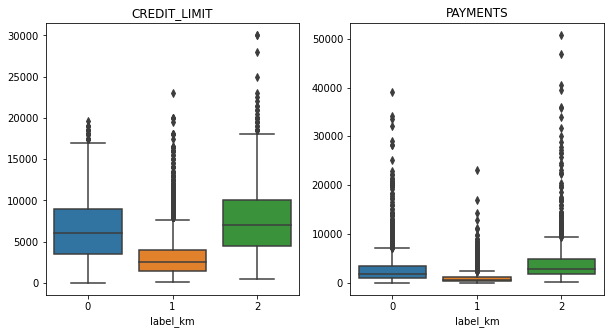




Kelompok Fitur 6: Urutan nilai maksimum kluster 1 < 0 < 2, tetapi urutan nilai Q3  1 < 2 < 0


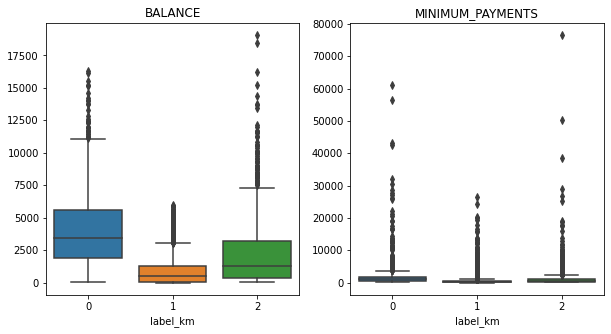

In [30]:
cols1 = ['TENURE', 'BALANCE_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY']
cols2 = ['PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'PRC_FULL_PAYMENT']
cols3 = ['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'PURCHASES_TRX']
cols4 = ['CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX']
cols5 = ['CREDIT_LIMIT', 'PAYMENTS']
cols6 = ['BALANCE', 'MINIMUM_PAYMENTS']

cols_lists = [cols1, cols2, cols3, cols4, cols5, cols6]
groupchart_titles = [
    'Kelompok Fitur 1: Ada kemiripan distribusi di antara kluster',
    'Kelompok Fitur 2: Frekuensi Pembayaran\n' + \
        'Nilai maksimum sama, tetapi urutan nilai Q3 antara kluster berbeda: 0 < 1 < 2',
    'Kelompok Fitur 3: Jumlah Pembelian\n' + \
        'Nilai maksimum kluster 2 jauh lebih tinggi dan urutan nilai Q3 kluster 0 < 1 < 2',
    'Kelompok Fitur 4: Uang Muka\n' + \
        'Urutan nilai maksimum kluster 1 < 2 < 0, tetapi urutan nilai Q3  2 < 1 < 0',
    'Kelompok Fitur 5: Urutan nilai upper bound dan Q3 kluster 1 < 0 < 2',
    'Kelompok Fitur 6: Urutan nilai maksimum kluster 1 < 0 < 2, tetapi urutan nilai Q3  1 < 2 < 0'
]

for lst, ttl in zip(cols_lists, groupchart_titles):
    nc = len(lst)
    print(ttl)
    plt.figure(figsize=(5*nc, 5))
    for i, col in enumerate(lst):
        plt.subplot(1, nc, i+1)
        sns.boxplot(x="label_km", y=col, data=df)
        plt.ylabel('')
        plt.title(col)
    plt.show()
    print('\n\n')

Dari grafik kelompok fitur di atas, saya mencoba mengkategorikan kluster.
- Kelompok fitur 1 diabaikan. Ada kesamaan di antara distribusi fitur sehingga tidak bisa dikategorikan.
- Berdasarkan frekuensi pembelian (kelompok fitur 2), kluster dapat dikategorikan sebagai berikut.
    - Kluster 0 memliki frekuensi pembelian rendah.
    - Kluster 1 memliki frekuensi pembelian sedang.
    - Kluster 2 memliki frekuensi pembelian tinggi.
- Berdasarkan jumlah pembelian (kelompok fitur 3), kluster dapat dikategorikan sebagai berikut.
    - Kluster 0 memliki nilai pembelian kecil.
    - Kluster 1 memliki nilai pembelian sedang.
    - Kluster 2 memliki nilai pembelian besar.
- Berdasarkan fitur terkait layanan 'Cash in Advanced' (kelompok fitur 4), kluster dapat dikategorikan sebagai berikut.
    - Kluster 0 memliki tingkat penggunaan fitur layanan 'Cash in Advanced' tinggi.
    - Kluster 1 memliki tingkat penggunaan fitur layanan 'Cash in Advanced' sedang.
    - Kluster 2 memliki tingkat penggunaan fitur layanan 'Cash in Advanced' rendah.
- Berdasarkan jumlah pembayaran dan batas kredit (kelompok fitur 5), kluster dapat dikategorikan sebagai berikut.
    - Kluster 0 memliki jumlah pembayaran yang diselesaikan dan batas kredit sedang.
    - Kluster 1 memliki jumlah pembayaran yang diselesaikan dan batas kredit kecil.
    - Kluster 2 memliki jumlah pembayaran yang diselesaikan dan batas kredit besar.
- Berdasarkan saldo dan pembayaran minimum (kelompok fitur 6), kluster dapat dikategorikan sebagai berikut.
    - Kluster 0 memliki saldo dan pembayaran minimum besar.
    - Kluster 1 memliki saldo dan pembayaran minimum kecil.
    - Kluster 2 memliki saldo dan pembayaran minimum sedang.

Selanjutnya, saya memberi kluster sebuah nama sesuai hasil yang telah dijabarkan di atas.
- Kluster 0: **Cash Advance Customer**  
Pelanggan yang suka menggunakan layanan 'Cash in Advanced'
    1. Tingkat frekuensi pembelian rendah.
    2. Nilai pembelian kecil.
    3. Penggunaan fitur layanan 'Cash in Advanced' tinggi.
    4. Jumlah pembayaran yang diselesaikan dan batas kredit sedang.
    5. Sisa saldo saat pembelian dan jumlah pembayaran minimum besar.
- Kluster 1: **Regular Customer**  
pelanggan dengan penggunaan layanan 'Cash in Advanced' dan pembelian dengan kartu kredit seimbang.
    1. Tingkat frekuensi pembelian sedang.
    2. Nilai pembelian sedang.
    3. Penggunaan fitur layanan 'Cash in Advanced' sedang.
    4. Jumlah pembayaran yang diselesaikan dan batas kredit kecil.
    5. Sisa saldo saat pembelian dan jumlah pembayaran minimum kecil.
- Kluster 2: **Shopping Customer**  
Pelanggan yang suka menggunakan pembelian dengan kartu kredit.
    1. Tingkat frekuensi pembelian tinggi.
    2. Nilai pembelian besar.
    3. Penggunaan fitur layanan 'Cash in Advanced' rendah.
    4. Jumlah pembayaran yang diselesaikan dan batas kredit besar.
    5. Sisa saldo saat pembelian dan jumlah pembayaran minimum sedang.

## Model Inferensi

In [31]:
# membuat data dummy
inf_df = pd.DataFrame(columns=data.columns[:-3])

# membuat nilai random dari sebaran data dari data mentah
for col in inf_df.columns:
    inf_df[col] = data[col].sample(3).values

inf_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,333.810017,1.0,1500.0,568.46,0.0,1531.176754,0.166667,0.000000,0.916667,0.083333,0,1,1800.0,11707.953520,1282.428401,0.333333,12
1,100.212638,1.0,0.0,0.00,0.0,1710.197063,0.583333,0.111111,1.000000,0.083333,27,0,3300.0,543.829920,982.558921,0.000000,12
2,719.592571,1.0,390.0,0.00,994.0,0.000000,0.000000,0.916667,1.000000,0.000000,0,9,1200.0,1095.198415,210.924256,0.000000,12


In [32]:
# standarisasi
inf_scaled = stdscaler.transform(inf_df)
# prediksi
label_inf = kmeans.predict(inf_scaled)
inf_df['cluster'] = label_inf
inf_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,333.810017,1.0,1500.0,568.46,0.0,1531.176754,0.166667,0.000000,0.916667,0.083333,0,1,1800.0,11707.953520,1282.428401,0.333333,12,1
1,100.212638,1.0,0.0,0.00,0.0,1710.197063,0.583333,0.111111,1.000000,0.083333,27,0,3300.0,543.829920,982.558921,0.000000,12,1
2,719.592571,1.0,390.0,0.00,994.0,0.000000,0.000000,0.916667,1.000000,0.000000,0,9,1200.0,1095.198415,210.924256,0.000000,12,1


Dari perilaku pelanggan di atas, model mengklasifikasi pelanggan ke dalam kluster yang tertera pada kolom 'cluster'.

## Kesimpulan

- Di antara model KMeans, Agglomerative Clustering, dan Gaussian Mixture, model yang saya rasa cukup baik untuk mengklasifikasikan data perilaku pelanggan kartu kredit dalam analisis ini adalah model KMeans. Penilaian ini berdasarkan gambaran secara visual PCA 2 dimensi dan skor silhoutte.
- Melalui model KMeans, saya membagi perilaku pelanggan dalam 3 kluster sebagai berikut.
    1. Kluster **Cash Advance Customer** yaitu pelanggan yang suka menggunakan layanan 'Cash in Advanced' dengan ciri perilaku:
        - Tingkat frekuensi pembelian rendah.
        - Nilai pembelian kecil.
        - Penggunaan fitur layanan 'Cash in Advanced' tinggi.
        - Jumlah pembayaran yang diselesaikan dan batas kredit sedang.
        - Sisa saldo saat pembelian dan jumlah pembayaran minimum besar.
    2. Kluster **Regular Customer** yaitu pelanggan dengan penggunaan layanan 'Cash in Advanced' dan pembelian dengan kartu kredit seimbang.
        - Tingkat frekuensi pembelian sedang.
        - Nilai pembelian sedang.
        - Penggunaan fitur layanan 'Cash in Advanced' sedang.
        - Jumlah pembayaran yang diselesaikan dan batas kredit kecil.
        - Sisa saldo saat pembelian dan jumlah pembayaran minimum kecil.
    3. Kluster 2: **Shopping Customer** yaitu pelanggan yang suka menggunakan pembelian dengan kartu kredit.
        - Tingkat frekuensi pembelian tinggi.
        - Nilai pembelian besar.
        - Penggunaan fitur layanan 'Cash in Advanced' rendah.
        - Jumlah pembayaran yang diselesaikan dan batas kredit besar.
        - Sisa saldo saat pembelian dan jumlah pembayaran minimum sedang.